# **Ad Click Prediction Detection using ensembled classifiers**

Importing the libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

ModuleNotFoundError: No module named 'pandas'

**Exploratory Data Analysis**

The diabetes dataset from Kaggle is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. It contains 9 variables:

1. **Pregnancies**: Number of times pregnant
2. **Glucose**: Plasma glucose concentration a 2 hours in an oral glucose tolerance test
3. **BloodPressure**: Diastolic blood pressure (mm Hg)
4. **SkinThickness**: Triceps skin fold thickness (mm)
5. **Insulin**: 2-Hour serum insulin (mu U/ml)
6. **BMI**: Body mass index (weight in kg/(height in m)^2)
7. **DiabetesPedigreeFunction**: Diabetes pedigree function
8. **Age**: Age (years)
9. **Outcome**: Class variable (0 or 1)

The `Outcome` variable is the target variable, and it indicates whether or not a person has diabetes, with 1 meaning the person has diabetes and 0 meaning the person does not⁴.

This dataset is often used for both predictive and descriptive analyses, using various algorithms.

In [ ]:
dataset = pd.read_csv('advertising.csv')
dataset.shape

(768, 9)

In [ ]:
EDA_table = pd.DataFrame(dataset).describe().transpose()
EDA_table.to_csv("EDA_table.csv")
EDA_table

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


The statistical summary of the dataset reveals that the average number of times a person has been pregnant is approximately 3.85, with a standard deviation of about 3.37. The average glucose level is around 120.89 with a standard deviation of approximately 31.97. The average blood pressure is about 69.11 with a standard deviation of approximately 19.36. The average skin thickness is around 20.54 with a standard deviation of approximately 15.95. The average insulin level is about 79.80 with a standard deviation of approximately 115.24. The average Body Mass Index (BMI) is approximately 31.99 with a standard deviation of about 7.88. The average Diabetes Pedigree Function score is around 0.47 with a standard deviation of approximately 0.33. The average age is approximately 33 years with a standard deviation of about 11 years.

The ‘Outcome’ variable indicates that about 35% of the people in this dataset have diabetes.

*Checking the correlation*

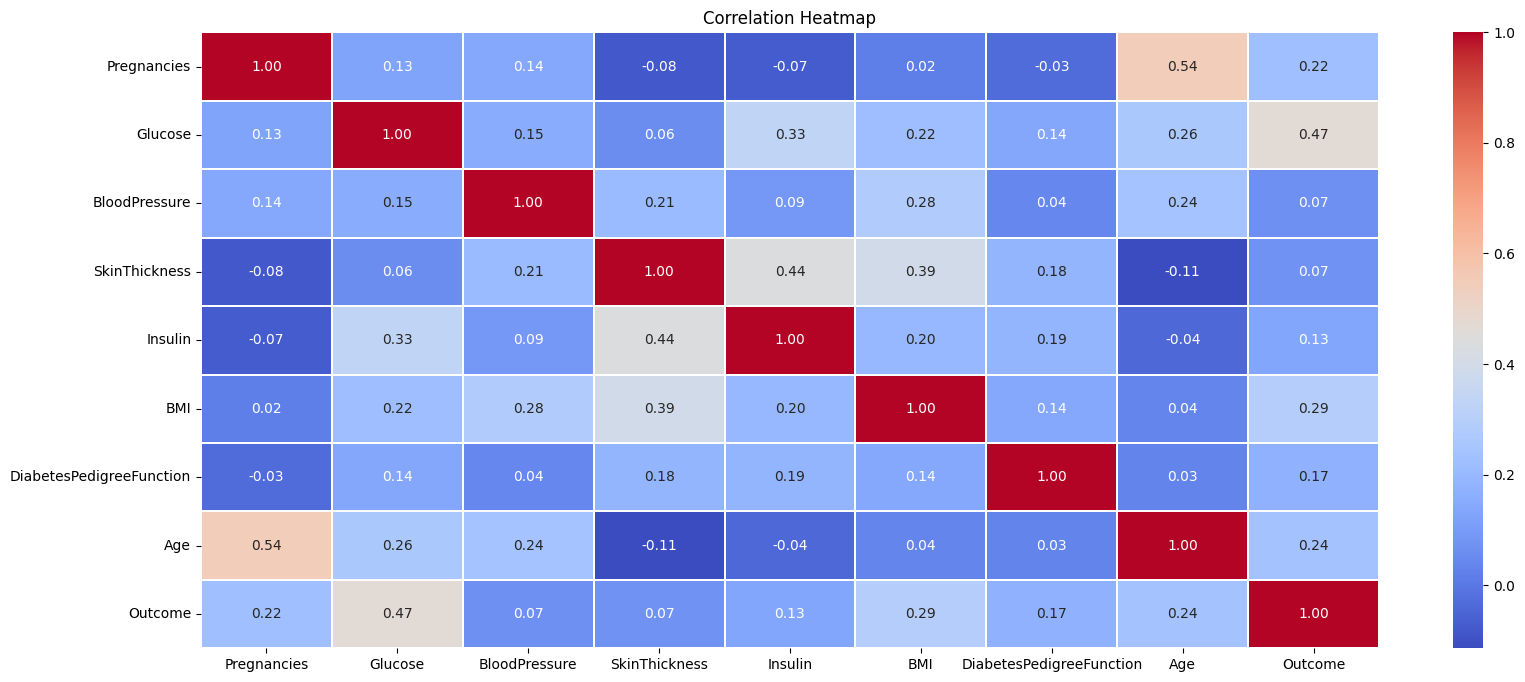

In [ ]:
# Calculate the correlation matrix (Pearson correlation) between X and y
correlation_matrix = dataset.corr()

# Create a figure
plt.figure(figsize=(19, 8))

# Create the heatmap
sns.heatmap(correlation_matrix, cmap="coolwarm", annot=True, fmt=".2f", linewidths=.05)

# Add a title
plt.title('Correlation Heatmap')

# Show the plot
plt.show()

*Histogram analysis*

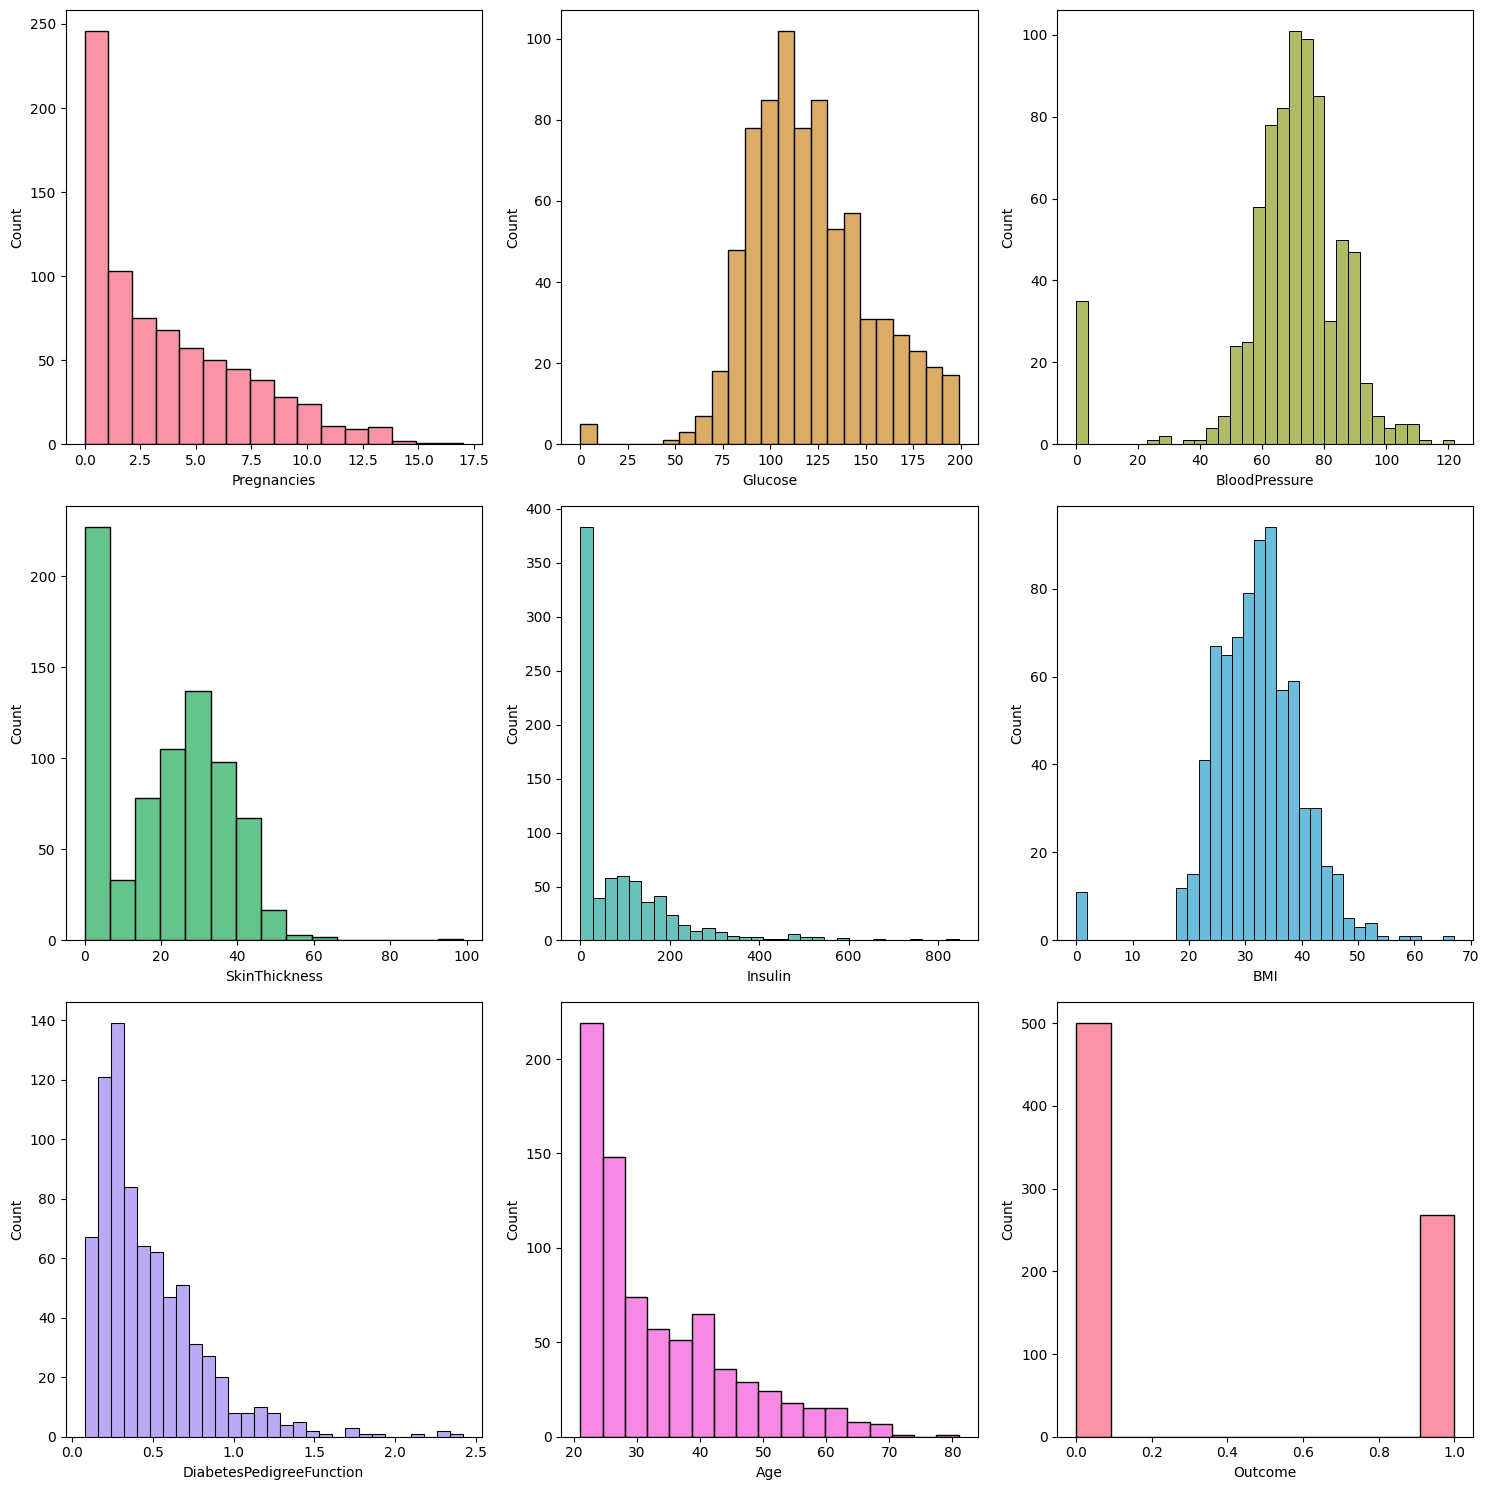

In [ ]:
# Create a figure and a set of subplots
fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(15, 15))

# Flatten the array of axes
axs = axs.flatten()

# Define the color palette
palette = sns.color_palette("husl", 8)

# Loop over each variable
for i, col in enumerate(dataset.columns):
    sns.histplot(dataset[col], ax=axs[i], color=palette[i % 8])

plt.tight_layout()
plt.show()

*Violin Plot analysis*

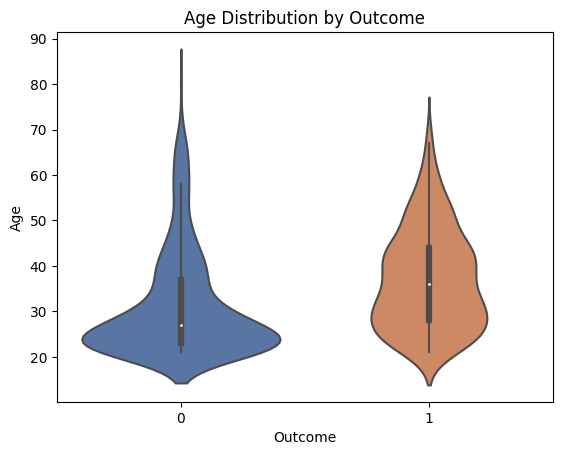

In [ ]:
# Define the color palette
palette = sns.color_palette("deep",2)

# Create the violin plot
sns.violinplot(x='Outcome', y='Age', data=dataset, palette=palette)

# Add a title
plt.title('Age Distribution by Outcome')

# Add labels for x and y axes
plt.xlabel('Outcome')
plt.ylabel('Age')

plt.show()

*Box Plot Analysis*

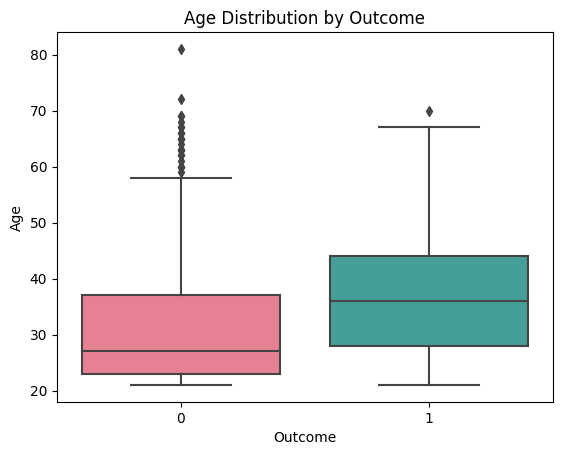

In [ ]:
# Define the color palette
palette = sns.color_palette("husl", 2)

# Create the box plot
sns.boxplot(x='Outcome', y='Age', data=dataset, palette=palette)

# Add a title
plt.title('Age Distribution by Outcome')

# Add labels for x and y axes
plt.xlabel('Outcome')
plt.ylabel('Age')

plt.show()

Checking if there's any majority class or not.

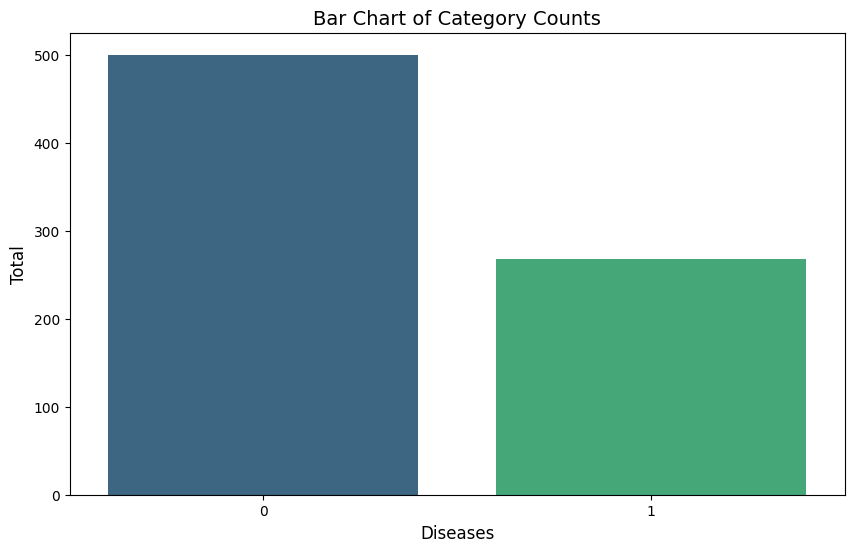

In [ ]:
# Calculate the category counts
category_counts = dataset.iloc[:,-1].value_counts()

# Create a figure
plt.figure(figsize=(10, 6))

# Create the bar chart
sns.barplot(x=category_counts.index, y=category_counts.values, palette="viridis")

# Add labels for x and y axes
plt.xlabel('Diseases', fontsize=12)
plt.ylabel('Total', fontsize=12)

# Add a title
plt.title('Bar Chart of Category Counts', fontsize=14)

# Show the plot
plt.show()

In this dataset, the primary objective is to accurately classify true positive values and minimize Type II errors (false negatives). This is crucial because in medical scenarios, incorrectly predicting a negative outcome (i.e., no disease) when the reality is positive (i.e., disease present) can have serious implications.

However, the dataset is imbalanced with ‘0’ as the majority class. If we train a model on this dataset as it is, the model might be biased towards the majority class, leading to less accurate predictions for the minority class (‘1’).

**Data Preperation**

differentiating the independent and dependent variables

In [ ]:
X = dataset.iloc[:,:-1].values
y=dataset.iloc[:,-1].values
# y = y.astype(bool)
# X = X.astype(int)

y

array([1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1,

Spliting the training set and test set

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,stratify=y,shuffle=True)
X_train

array([[  2.   ,  84.   ,  50.   , ...,  30.4  ,   0.968,  21.   ],
       [  6.   , 195.   ,  70.   , ...,  30.9  ,   0.328,  31.   ],
       [  2.   , 122.   ,  70.   , ...,  36.8  ,   0.34 ,  27.   ],
       ...,
       [  7.   , 137.   ,  90.   , ...,  32.   ,   0.391,  39.   ],
       [  4.   , 183.   ,   0.   , ...,  28.4  ,   0.212,  36.   ],
       [  5.   ,   0.   ,  80.   , ...,  41.   ,   0.346,  37.   ]])

checking the ratio of test and training set

In [ ]:

trainSetRatio = np.sum(y_train == 1) / len(y_train)
testSetRatio = np.sum(y_test == 1) / len(y_test)

print(trainSetRatio, testSetRatio)

0.3485342019543974 0.35064935064935066


Feature scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train  = sc_X.fit_transform(X_train)
X_test  = sc_X.transform(X_test)
X = sc_X.fit_transform(X)
X_test.shape

(154, 8)

Reducing the features into 2 using PCA/LDA to see if the model can accurately classify them into 2 groups or not

In [ ]:
# from sklearn.decomposition import PCA
# pca = PCA(n_components=2)
# X_train = pca.fit_transform(X_train)
# X_test = pca.transform(X_test)


# from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
# lda =LinearDiscriminantAnalysis(n_components=1)
# X_train = lda.fit_transform(X_train,y_train)
# X_test = lda.transform(X_test)


# from sklearn.decomposition import KernelPCA
# kpca = KernelPCA(n_components=2,kernel='rbf')
# X_train = kpca.fit_transform(X_train)
# X_test = kpca.transform(X_test)

# from sklearn.decomposition import FastICA
# ica = FastICA(n_components=2, random_state=0)
# X_train= ica.fit_transform(X_train)
# X_test= ica.transform(X_test)

# *ML from here*

Import necessary classifiers

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

2 funcitions for creating and fitting the training data

In [ ]:
def create_classifiers():
    return {
        'Logistic Regression Classifier': LogisticRegression(),
        'Decision Tree Classifier': DecisionTreeClassifier(),
        'K-Nearest Neighbor Classifier': KNeighborsClassifier(),
        'Random Forest Classifier': RandomForestClassifier(),
        'Support Vector Classifier': SVC(),
        'Gaussian Naive Bayes Classifier': GaussianNB(),
        'Extreme Gradient Boosting Classifier': XGBClassifier(),
    }


In [ ]:
def fit_classifiers(classifiers, X_train, y_train):
    fitted_classifiers = {}
    for name, classifier in classifiers.items():
        classifier.fit(X_train, y_train)
        fitted_classifiers[name] = classifier
    return fitted_classifiers

Fit the X_train and y_train into the classifiers

In [ ]:
classifiers = create_classifiers()
models = fit_classifiers(classifiers, X_train, y_train)

Finding the best models through analysis (Training data)

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import (
    accuracy_score, recall_score, precision_score, f1_score
)


def evaluate_models(models, X, y, train=True):
    results = []
    dataset_type = "Train" if train else "Test"

    for model_name in models.values():
        row = {}

        # Predictions and metrics calculation
        y_pred = model_name.predict(X)
        y_pred = np.array(y_pred)
        scores = cross_val_score(model_name, X, y, cv=10)
        accuracy = accuracy_score(y, y_pred)
        recall = recall_score(y, y_pred)
        precision = precision_score(y, y_pred)
        f1_result = f1_score(y, y_pred)
        row = {
            'Model': model_name,
            'Dataset': dataset_type,
            'CV Mean Score (10)':scores.mean()*100,
            'CV Std Score (10)': scores.std()*100,
            'Accuracy': accuracy,
            'Precision': precision,
            'Recall': recall,
            'F1 Score': f1_result,
        }
        results.append(row)

    return pd.DataFrame(results)


train_results_df = evaluate_models(models, X_train, y_train, train=True)
train_results_df


,Model,Dataset,CV Mean Score (10),CV Std Score (10),Accuracy,Precision,Recall,F1 Score
0,LogisticRegression(),Train,78.178213,4.369433,0.788274,0.744186,0.598131,0.663212
1,DecisionTreeClassifier(),Train,72.977261,4.434076,1.000000,1.000000,1.000000,1.000000
2,KNeighborsClassifier(),Train,73.942359,4.432440,0.820847,0.765306,0.700935,0.731707
3,"(DecisionTreeClassifier(max_features='sqrt', r...",Train,75.404548,5.287187,1.000000,1.000000,1.000000,1.000000
4,SVC(),Train,74.103649,3.606759,0.828990,0.811429,0.663551,0.730077
5,GaussianNB(),Train,75.729773,4.962461,0.775244,0.691919,0.640187,0.665049
6,"XGBClassifier(base_score=None, booster=None, c...",Train,73.283977,4.568384,1.000000,1.000000,1.000000,1.000000


The test data

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import (
    accuracy_score, recall_score, precision_score, f1_score
)


def evaluate_models(models, X, y, train):
    results = []
    dataset_type = "Train" if train else "Test"

    for model_name in models.values():
        row = {}

        # Predictions and metrics calculation
        y_pred = model_name.predict(X)
        y_pred = np.array(y_pred)
        scores = cross_val_score(model_name, X, y, cv=10)
        accuracy = accuracy_score(y, y_pred)
        recall = recall_score(y, y_pred)
        precision = precision_score(y, y_pred)
        f1_result = f1_score(y, y_pred)
        row = {
            'Model': model_name,
            'Dataset': dataset_type,
            'CV Mean Score (10)':scores.mean()*100,
            'CV Std Score (10)': scores.std()*100,
            'Accuracy': accuracy,
            'Precision': precision,
            'Recall': recall,
            'F1 Score': f1_result,
        }
        results.append(row)

    return pd.DataFrame(results)


test_results_df = evaluate_models(models, X_test, y_test, train=False)
test_results_df


,Model,Dataset,CV Mean Score (10),CV Std Score (10),Accuracy,Precision,Recall,F1 Score
0,LogisticRegression(),Test,72.291667,12.558543,0.727273,0.666667,0.444444,0.533333
1,DecisionTreeClassifier(),Test,63.041667,12.508400,0.681818,0.547170,0.537037,0.542056
2,KNeighborsClassifier(),Test,61.666667,9.477678,0.675325,0.543478,0.462963,0.500000
3,"(DecisionTreeClassifier(max_features='sqrt', r...",Test,66.416667,13.899690,0.727273,0.650000,0.481481,0.553191
4,SVC(),Test,67.125000,12.686730,0.746753,0.702703,0.481481,0.571429
5,GaussianNB(),Test,70.166667,11.535272,0.740260,0.666667,0.518519,0.583333
6,"XGBClassifier(base_score=None, booster=None, c...",Test,64.375000,8.289991,0.714286,0.613636,0.500000,0.551020


Ensambled classifier with the help of the best classifier before

In [ ]:
from sklearn.ensemble import VotingClassifier

# Create the individual classifiers
clf1 = LogisticRegression()
clf2 = GaussianNB()
clf3 = SVC(probability=True)
clf4 = XGBClassifier()

# Create and fit the voting classifier
eclf = VotingClassifier(estimators=[('lr', clf1), ('gnb', clf2), ('svc', clf3),
                                    ('xgb', clf4)], voting='soft')

voting_dict = {
    'voting': eclf
}
eclf.fit(X_train, y_train)

VotingClassifier(estimators=[('lr', LogisticRegression()),
                             ('gnb', GaussianNB()),
                             ('svc', SVC(probability=True)),
                             ('xgb',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None,
                                            feature_types=None, gamma=None,
                                            gpu_id=None...None,
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_rate=None, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=None,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            n_estimators=100, n_jobs=None,
                                            num_parallel_tree=None,
                                            predictor=None, random_state=None, ...))],
                 voting='soft')

In [ ]:
voting_train = evaluate_models(voting_dict, X_train, y_train, train=True)
voting_train

,Model,Dataset,CV Mean Score (10),CV Std Score (10),Accuracy,Precision,Recall,F1 Score
0,"VotingClassifier(estimators=[('lr', LogisticRe...",Train,75.893707,4.977971,0.872964,0.865591,0.752336,0.805


In [ ]:
voting_test = evaluate_models(voting_dict, X_test, y_test, train=False)
voting_test

,Model,Dataset,CV Mean Score (10),CV Std Score (10),Accuracy,Precision,Recall,F1 Score
0,"VotingClassifier(estimators=[('lr', LogisticRe...",Test,67.041667,10.726152,0.733766,0.666667,0.481481,0.55914


In [ ]:
from sklearn.ensemble import StackingClassifier

# Create the base learners
base_learners = [
                 ('lr', LogisticRegression()),
                 ('gnb', GaussianNB()),
                 ('svc', SVC(probability=True))
                #  ('xgb', XGBClassifier())
                ]

# Initialize Stacking Classifier with the Meta Learner
clf = StackingClassifier(estimators=base_learners, final_estimator=LogisticRegression())

stacking_dict = {
    'staking': clf
}

# Fit the model to the training data
clf.fit(X_train, y_train)


StackingClassifier(estimators=[('lr', LogisticRegression()),
                               ('gnb', GaussianNB()),
                               ('svc', SVC(probability=True))],
                   final_estimator=LogisticRegression())

In [ ]:
stacking_train = evaluate_models(stacking_dict, X_train, y_train, train=True)
stacking_train

,Model,Dataset,CV Mean Score (10),CV Std Score (10),Accuracy,Precision,Recall,F1 Score
0,"StackingClassifier(estimators=[('lr', Logistic...",Train,77.519831,3.659096,0.798046,0.761628,0.61215,0.678756


In [ ]:
stacking_test = evaluate_models(stacking_dict, X_train, y_train, train=True)
stacking_test

,Model,Dataset,CV Mean Score (10),CV Std Score (10),Accuracy,Precision,Recall,F1 Score
0,"StackingClassifier(estimators=[('lr', Logistic...",Train,77.681121,3.686557,0.798046,0.761628,0.61215,0.678756


In [ ]:
# Evaluate the performance of the best model on the test data
test_accuracy = clf.score(X_test, y_test)
print("Test Accuracy of the Best Model:", test_accuracy)

Test Accuracy of the Best Model: 0.7337662337662337


Predicting the result

In [ ]:
y_pred = clf.predict(X_test)
type(y_pred[0])

numpy.int64

Making the confusion matrix

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true=y_test, y_pred=y_pred)
cm

array([[89, 11],
       [30, 24]], dtype=int64)

Visualizing the confusion matrix

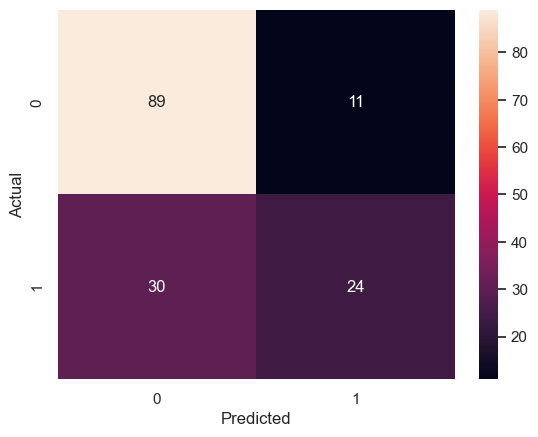

In [ ]:
df_cm =pd.DataFrame(cm)
sns.set()
sns.heatmap(df_cm, annot=True,fmt = 'd')

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

10 fold cross validation

In [ ]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator=clf,X=X,y=y,cv=10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 77.22 %
Standard Deviation: 3.54 %


Model Evaluation

In [ ]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,classification_report

accuracy = accuracy_score(y_pred=y_pred,y_true=y_test)
precision =precision_score(y_pred=y_pred,y_true=y_test)
recall = recall_score(y_pred=y_pred,y_true=y_test)
f1 = f1_score(y_pred=y_pred,y_true=y_test)
report  = classification_report(y_pred, y_test)

print("Accuracy on Test set: {:.2f} %".format(accuracy*100))
print("Precision on Test set: {:.2f} %".format(precision*100))
print("Recall on Test set: {:.2f} %".format(recall*100))
print("F1 Score on Test set: {:.2f} %".format(f1*100))
print(report)

Accuracy on Test set: 73.38 %
Precision on Test set: 68.57 %
Recall on Test set: 44.44 %
F1 Score on Test set: 53.93 %
              precision    recall  f1-score   support

           0       0.89      0.75      0.81       119
           1       0.44      0.69      0.54        35

    accuracy                           0.73       154
   macro avg       0.67      0.72      0.68       154
weighted avg       0.79      0.73      0.75       154



Visualising the training set result

In [ ]:
from matplotlib.colors import ListedColormap

X_set,y_set =X_train,y_train

# Define color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

# Create a mesh grid
h = .02  # step size in the mesh
x_min, x_max = X_set[:, 0].min() - 1, X_set[:, 0].max() + 1
y_min, y_max = X_set[:, 1].min() - 1, X_set[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Predict and reshape results
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the contour
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plot the training points
for i, color in zip(np.unique(y_set), cmap_bold.colors):
    idx = np.where(y_set == i)
    plt.scatter(X_set[idx, 0], X_set[idx, 1], c=color, edgecolor='k', s=20)

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("Logistic Regression (Training set)")
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.show()


ValueError: X has 2 features, but LogisticRegression is expecting 8 features as input.

Visualizing the Test set result

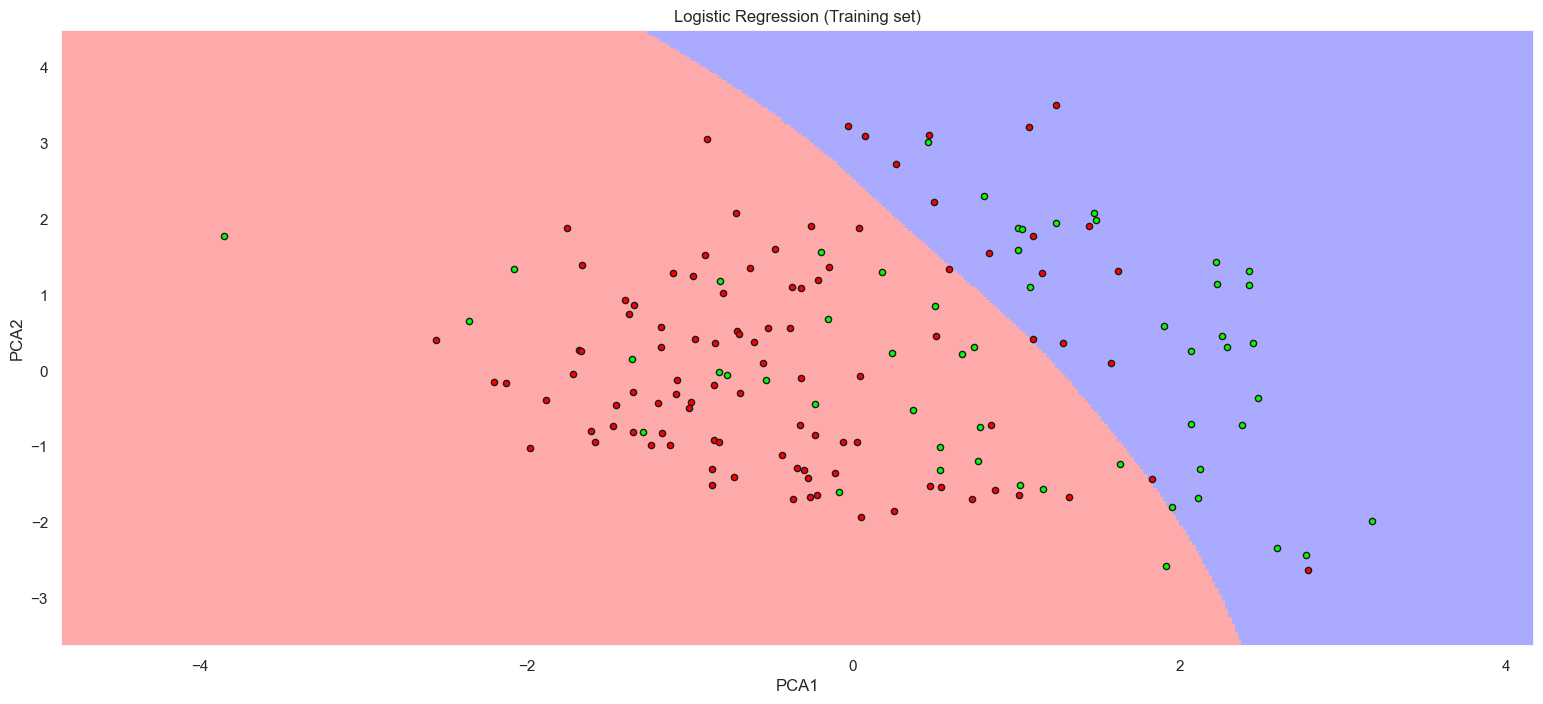

In [ ]:
from matplotlib.colors import ListedColormap

X_set,y_set =X_test,y_test

# Define color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

# Create a mesh grid
h = .02  # step size in the mesh
x_min, x_max = X_set[:, 0].min() - 1, X_set[:, 0].max() + 1
y_min, y_max = X_set[:, 1].min() - 1, X_set[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Predict and reshape results
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the contour
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plot the training points
for i, color in zip(np.unique(y_set), cmap_bold.colors):
    idx = np.where(y_set == i)
    plt.scatter(X_set[idx, 0], X_set[idx, 1], c=color, edgecolor='k', s=20)

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("Logistic Regression (Training set)")
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.show()
